In [1]:
import followthemoney_predict as ftmp
from followthemoney import model as ftm_model
import followthemoney as ftm

In [2]:
import pandas as pd
import seaborn as sns
import pylab as py
import numpy as np

from tqdm.notebook import tqdm

/home/micha/work/occrp/followthemoney-predict/venv/lib/python3.7/site-packages/seaborn/rcmod.py:5: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  import matplotlib as mpl


In [3]:
import json
import gzip
import glob
import random
from pprint import pprint

In [4]:
%autoreload 2
pd.options.display.max_columns = None

In [5]:
df = pd.read_parquet('../data/xref.aleph.all.parquet')

In [6]:
model_url = 'https://public.data.occrp.org/develop/models/xref/model.xgboost.785bc6c.pkl'
model_xgboost = ftmp.pipelines.xref.XrefModel.load(model_url)

In [7]:
df.head()

,left_name,left_schema,left_collection_id,left_id,left_country,left_address,left_registrationNumber,left_alias,left_status,left_classification,left_gender,left_firstName,left_lastName,left_birthPlace,left_birthDate,left_idNumber,left_motherName,left_nationality,right_name,right_schema,right_collection_id,right_id,right_country,right_address,right_registrationNumber,right_alias,right_status,right_classification,right_gender,right_firstName,right_lastName,right_birthPlace,right_birthDate,right_idNumber,right_motherName,right_nationality,judgement,source,phase,features,schema
0,ORHEI LADA SERVICE SRL,LegalEntity,187,21589258d9a25e03521c52260b183efb30988b1b.366f1...,md,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Firma """"Orhei-Lada-Service"""" SRL",LegalEntity,187,d7163a0263210f472f39fc525fd5bcf849846f56.47fdf...,md,"МД-3542, Республика Молдова, Орхейский район, ...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,profile,train,"[0.88, 0.6875, 1.0, nan, nan, nan, nan, nan, n...",LegalEntity
1,"Firma """"Orhei-Lada-Service"""" SRL",LegalEntity,187,d7163a0263210f472f39fc525fd5bcf849846f56.47fdf...,md,"МД-3542, Республика Молдова, Орхейский район, ...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Orhei Lada Service SRL,LegalEntity,187,b630346c97255911415a262449a59afe68a30209.f1a77...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,profile,train,"[0.88, 0.6875, 0.0, nan, nan, nan, nan, nan, n...",LegalEntity
2,Orhei Lada Service SRL,LegalEntity,187,b630346c97255911415a262449a59afe68a30209.f1a77...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,SRL Orhei-Lada-Service,Company,187,c05b5bcad168b0e5d588a1dc6aa9e43a1a27b362.6b51d...,md,r-ul Orhei s. Piatra,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,profile,train,"[0.8181818181818182, 1.0, 0.0, nan, nan, nan, ...",Company
3,ORHEI LADA SERVICE SRL,LegalEntity,187,21589258d9a25e03521c52260b183efb30988b1b.366f1...,md,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Orhei Lada Service SRL,LegalEntity,187,b630346c97255911415a262449a59afe68a30209.f1a77...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,profile,train,"[1.0, 1.0, 0.0, nan, nan, nan, nan, nan, nan, ...",LegalEntity
4,"Firma """"Orhei-Lada-Service"""" SRL",LegalEntity,187,d7163a0263210f472f39fc525fd5bcf849846f56.47fdf...,md,"МД-3542, Республика Молдова, Орхейский район, ...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,SRL Orhei-Lada-Service,Company,187,c05b5bcad168b0e5d588a1dc6aa9e43a1a27b362.6b51d...,md,r-ul Orhei s. Piatra,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,profile,train,"[0.8, 0.6875, 1.0, nan, nan, 0.0, nan, nan, na...",Company


In [8]:
df.source.value_counts()

positive    5068887
profile     3584134
negative    1482852
Name: source, dtype: int64

In [9]:
features = np.asarray(df.features.tolist()).T
features = np.nan_to_num(features, nan=-1)
for i, feature_name in enumerate(ftmp.pipelines.xref.settings.FEATURE_KEYS):
    df[f'f_{feature_name}'] = features[i, :]
del features

name


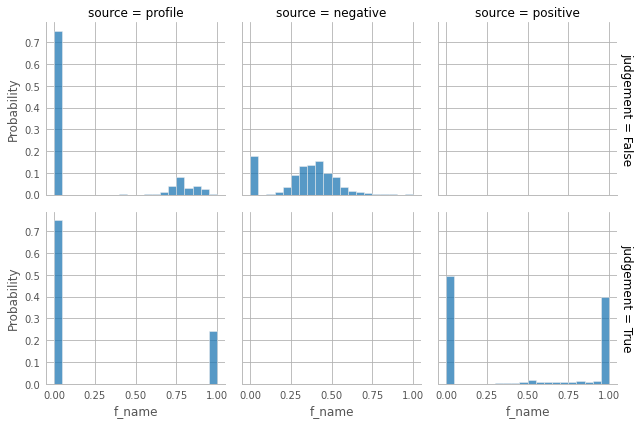

name_length_ratio


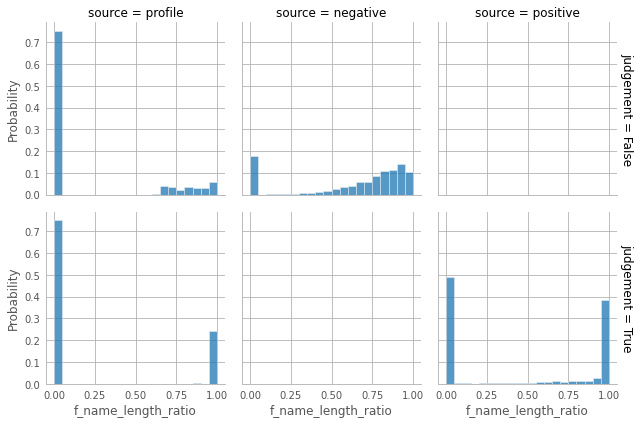

country


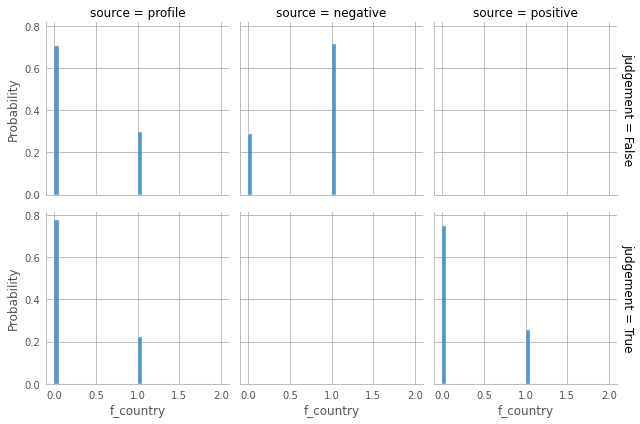

registrationNumber


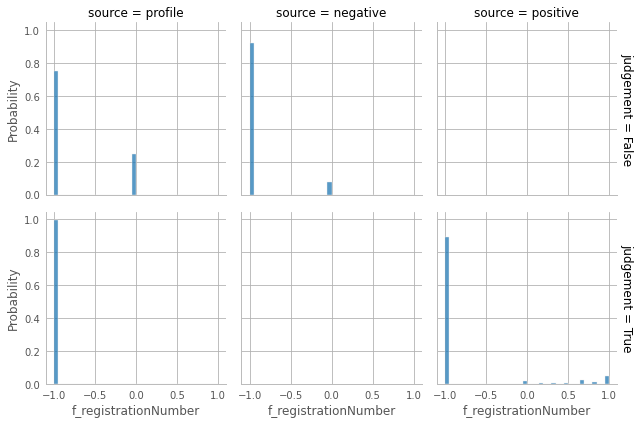

incorporationDate


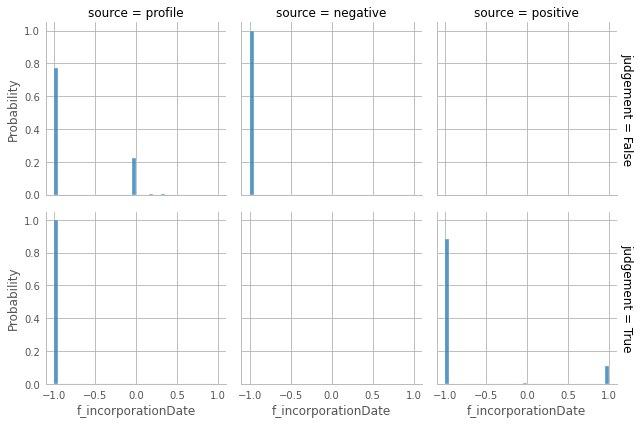

address


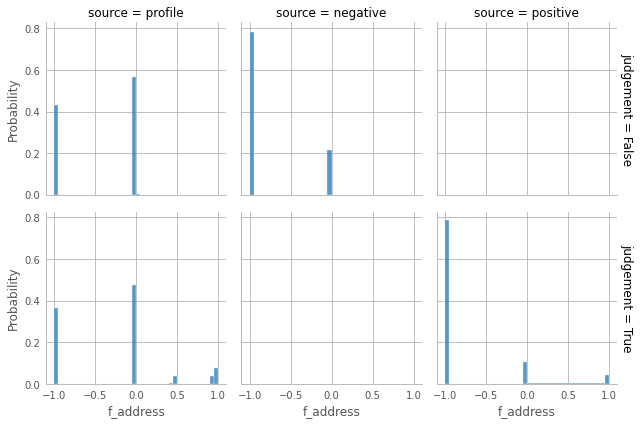

jurisdiction


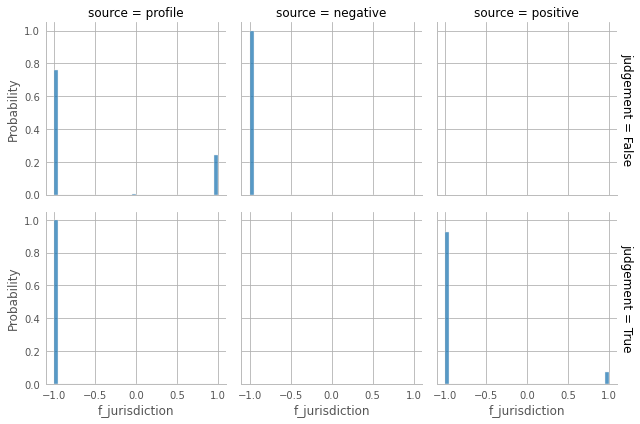

dissolutionDate


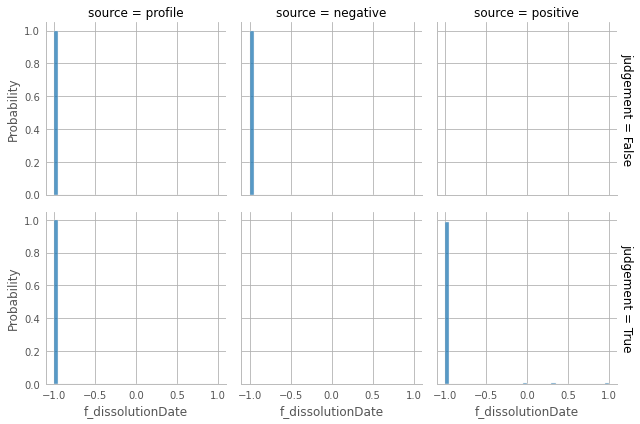

mainCountry


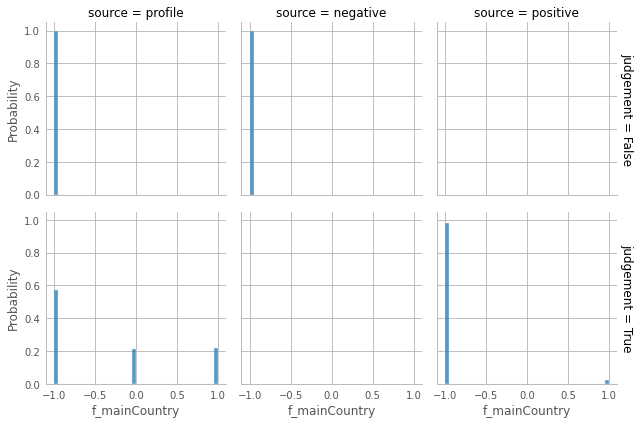

ogrnCode


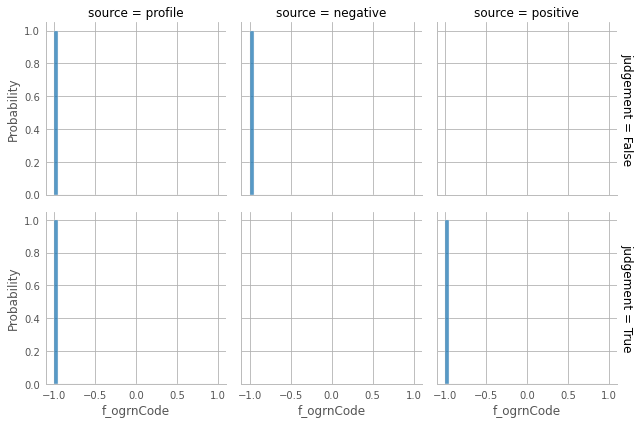

innCode


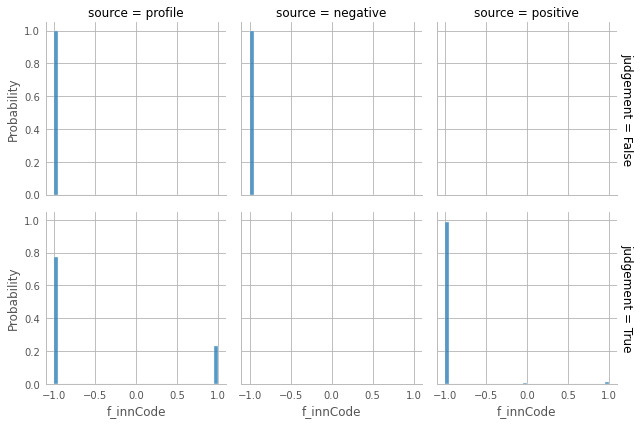

kppCode


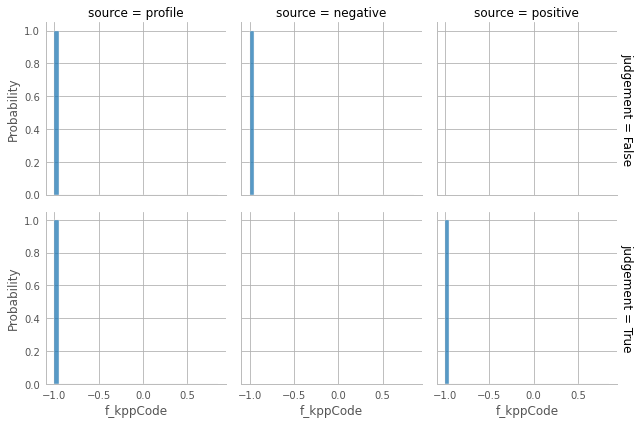

fnsCode


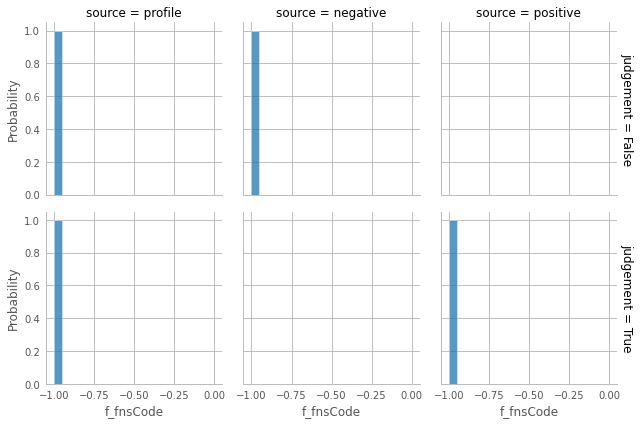

email


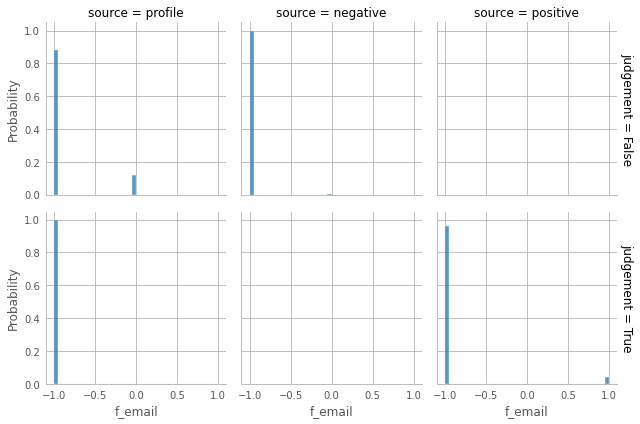

phone


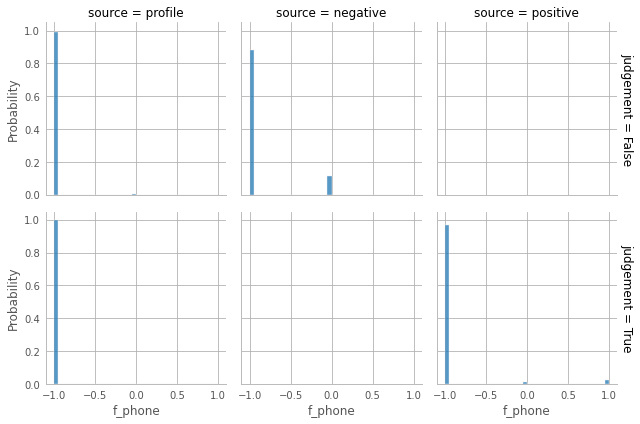

website


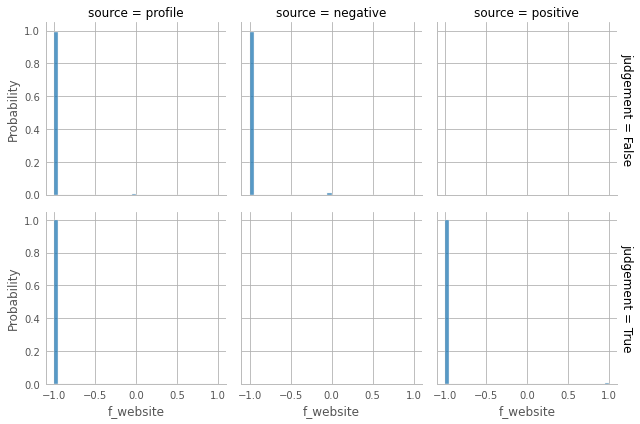

idNumber


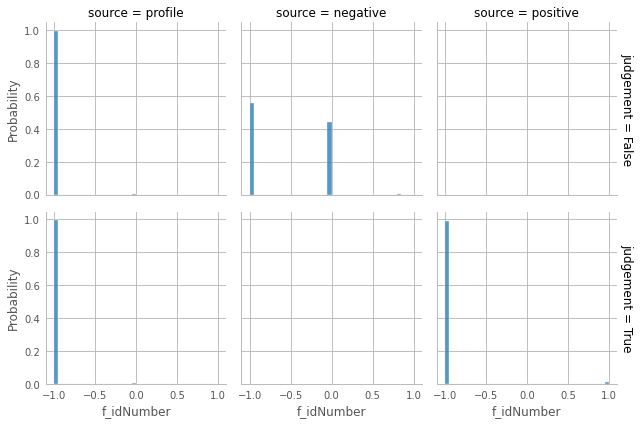

birthDate


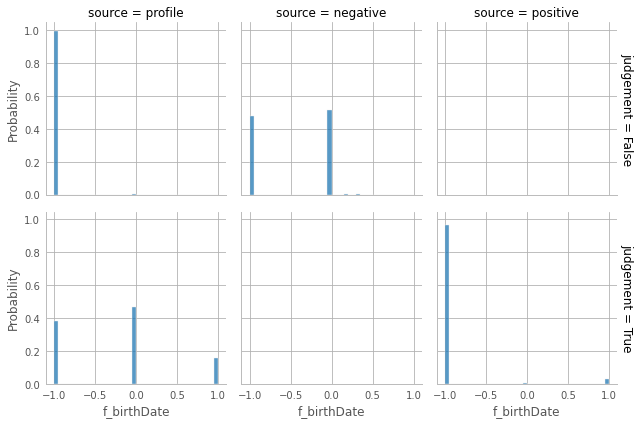

nationality


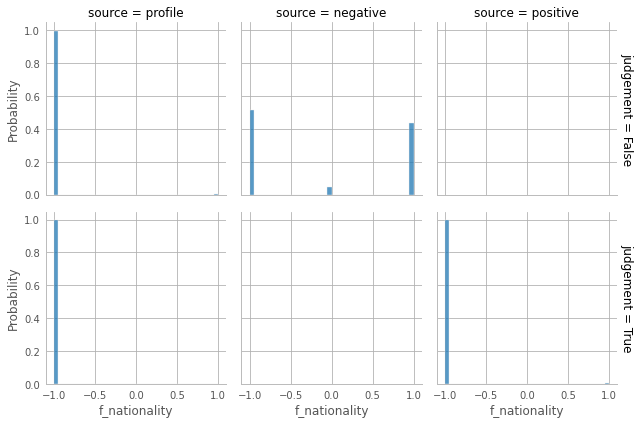

accountNumber


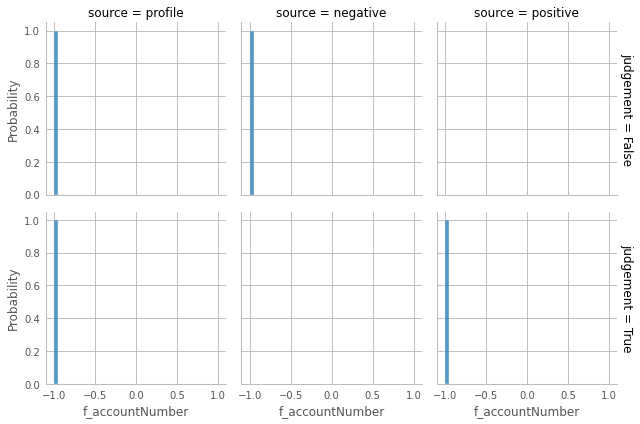

iban


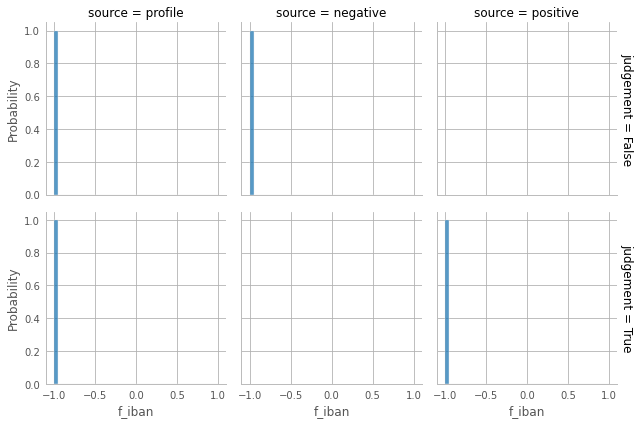

wikidataId


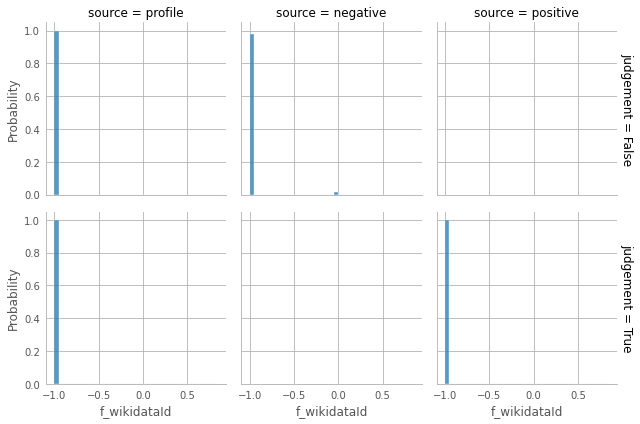

wikipediaUrl


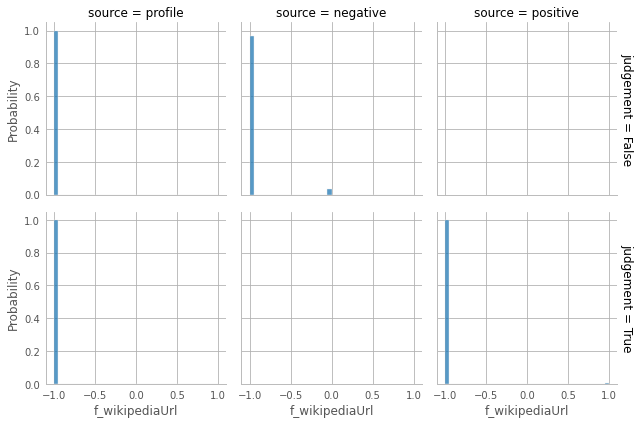

deathDate


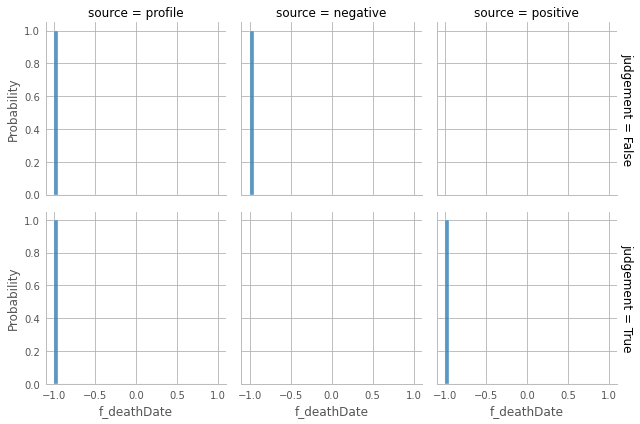

cikCode


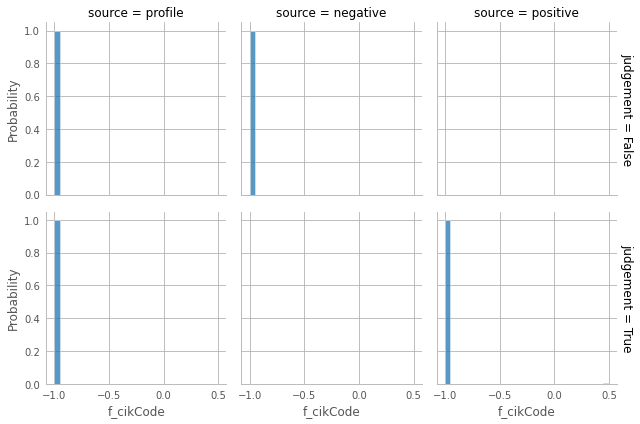

irsCode


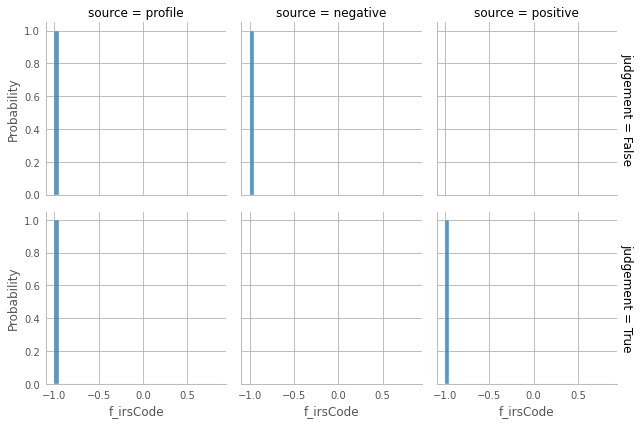

vatCode


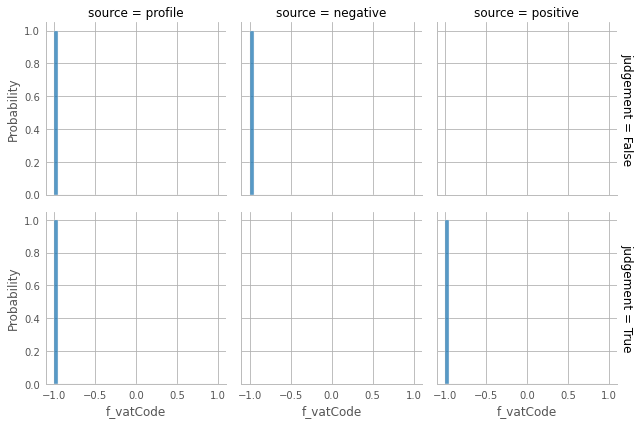

okpoCode


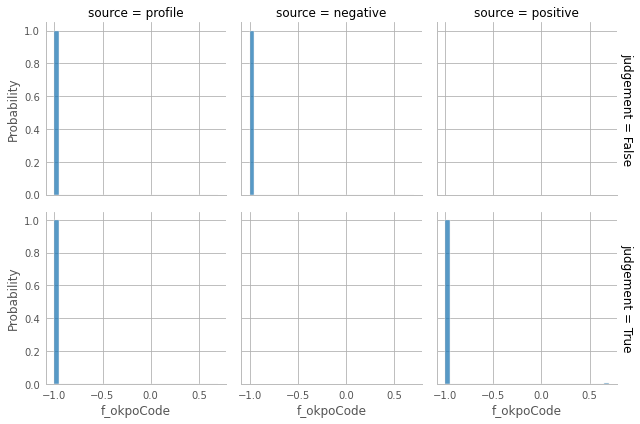

passportNumber


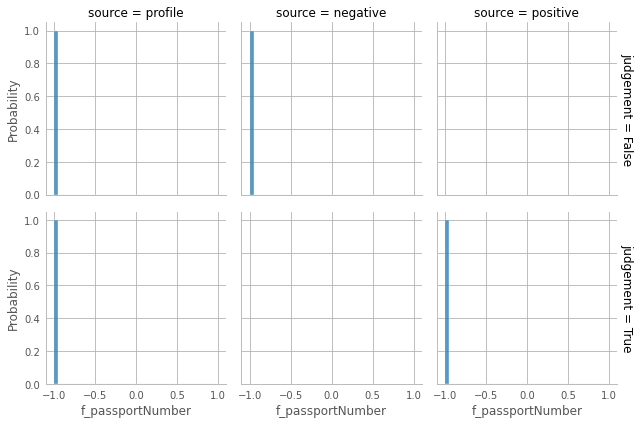

taxNumber


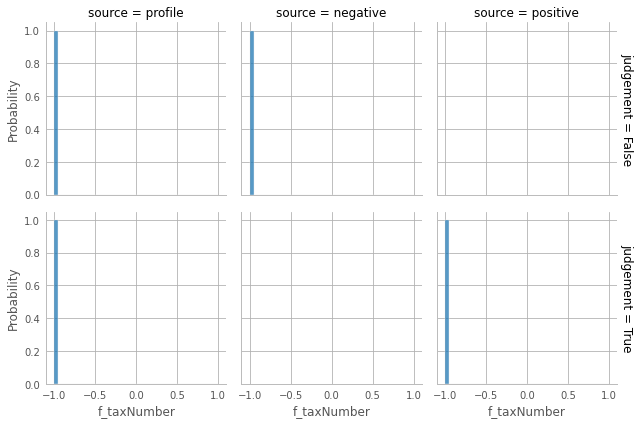

bvdId


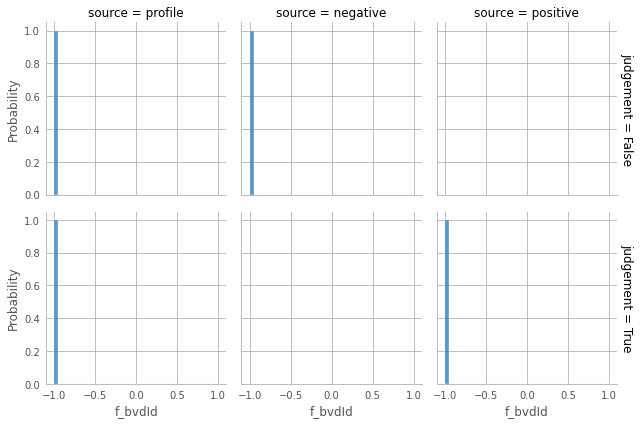

In [10]:
for feature in ftmp.pipelines.xref.settings.FEATURE_KEYS:
    print(feature)
    g = sns.displot(
        df, x=f"f_{feature}", col="source", row="judgement",
        binwidth=0.05, height=3, facet_kws=dict(margin_titles=True),
        stat='probability', common_norm=False
    )
    py.show()

<AxesSubplot:xlabel='f_name', ylabel='Count'>

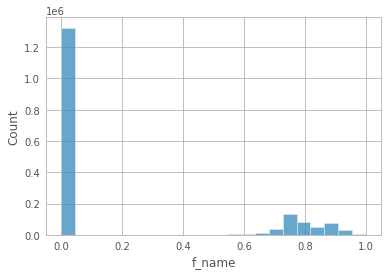

In [11]:
sns.histplot(df.query('source == "profile" and judgement == False').f_name)

In [12]:
df.query('source == "positive" and f_name > 0.6 and f_name < 0.8')[['left_name', 'right_name', 'f_name']].head(50)

,left_name,right_name,f_name
5066993,<NA>,<NA>,0.634146
5067051,<NA>,С. М. Лавріненко,0.642857
5067063,С. К. Продіус,<NA>,0.636364
5067066,Варвара Вікторівна Полозова,<NA>,0.666667
5067067,Варвара Вікторівна Полозова,<NA>,0.666667
5067081,<NA>,А. Г. Кондаков,0.666667
5067087,О. П. Тамакулов,<NA>,0.692308
5067105,С. Д. Шпенова,<NA>,0.636364
5067107,<NA>,К. В. Богомолова,0.714286
5067135,<NA>,А. О. Клименко,0.666667


In [13]:
df.query('source == "profile"')[['left_name', 'right_name', 'f_name', 'judgement']].head()

,left_name,right_name,f_name,judgement
0,ORHEI LADA SERVICE SRL,"Firma """"Orhei-Lada-Service"""" SRL",0.880000,True
1,"Firma """"Orhei-Lada-Service"""" SRL",Orhei Lada Service SRL,0.880000,True
2,Orhei Lada Service SRL,SRL Orhei-Lada-Service,0.818182,True
3,ORHEI LADA SERVICE SRL,Orhei Lada Service SRL,1.000000,True
4,"Firma """"Orhei-Lada-Service"""" SRL",SRL Orhei-Lada-Service,0.800000,True


In [14]:
entities_multiproperty = []
fnames = glob.glob('../cache/collection_cache/*.jsonl.gz')
random.shuffle(fnames)
for fname in tqdm(fnames):
    with gzip.open(fname) as fd:
        for line in tqdm(fd, leave=False):
            data = json.loads(line)
            if any(len(p) > 1 for k, p in data['properties'].items() if k not in ftmp.pipelines.xref.settings.FIELDS_BAN_SET):
                data['source_file'] = fname
                entities_multiproperty.append(data)
    if len(entities) > 2000:
        break

KeyboardInterrupt: 

In [ ]:
random.shuffle(entities_multiproperty)
entities_multiproperty

In [ ]:
e = entities_multiproperty[1]
pprint(e)
pprint(ftmp.pipelines.xref.pipeline.entity_to_samples(e))

In [15]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [17]:
train, test = model_xgboost.prepair_train_test(df)

KeyboardInterrupt: 

In [ ]:
train_X = ftmp.pipeline.xref.util.xarray(train.features)
test_X = ftmp.pipeline.xref.util.xarray(test.features)

In [ ]:
params = {
    "objective": "binary:logistic",
    "n_estimators": [20, 50, 75, 90, 100, 120],
    "max_depth": [2, 4, 6, 10],
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 0, 3],
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bylevel": [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "min_child_weight": [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
    "gamma": [0, 0.25, 0.5, 1.0],
    "reg_lambda": [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
}


fit_params = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 10,
              'eval_set': [(x_valid, y_valid)]}